### Name : Ghosh Kushanava Amitava
### Roll No : 220123083
### Course : MA323 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Linear Congruential Generator (LCG)
def lcg(a, c, m, seed, n):
    random_numbers = []
    X = seed
    for _ in range(n):
        X = (a * X + c) % m
        random_numbers.append(X / m)  # Normalizing to [0, 1]
    return np.array(random_numbers)

In [3]:
# Box-Muller method using LCG
def box_muller(a, c, m, seed, n):
    u1 = lcg(a, c, m, seed, n)
    u2 = lcg(a, c, m, seed + 1, n)
    z0 = [math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i]) for i in range(n)]
    z1 = [math.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i]) for i in range(n)]
    return np.array(z0)

In [4]:
# Initialized constants for generating random numbers from LCG
m = 2**31 - 1
a = 1103515245
c = 12345
seed = 42

# Determine the number of paths and points per path
values = 5000
paths = 10

# Define the time step size and t-axis
interval = [0.0, 5.0]
dt = (interval[1] - interval[0]) / (values-1)
t_axis = np.linspace(interval[0], interval[1], values)

# Making a 2-D dimensional array consisting of 5000 normal random numbers for each paths
Z = np.zeros((paths, values))
for i in range(paths):
    C = box_muller(a, c, m, seed, values)
    Z[i] = C
    seed += 1

### Q.1

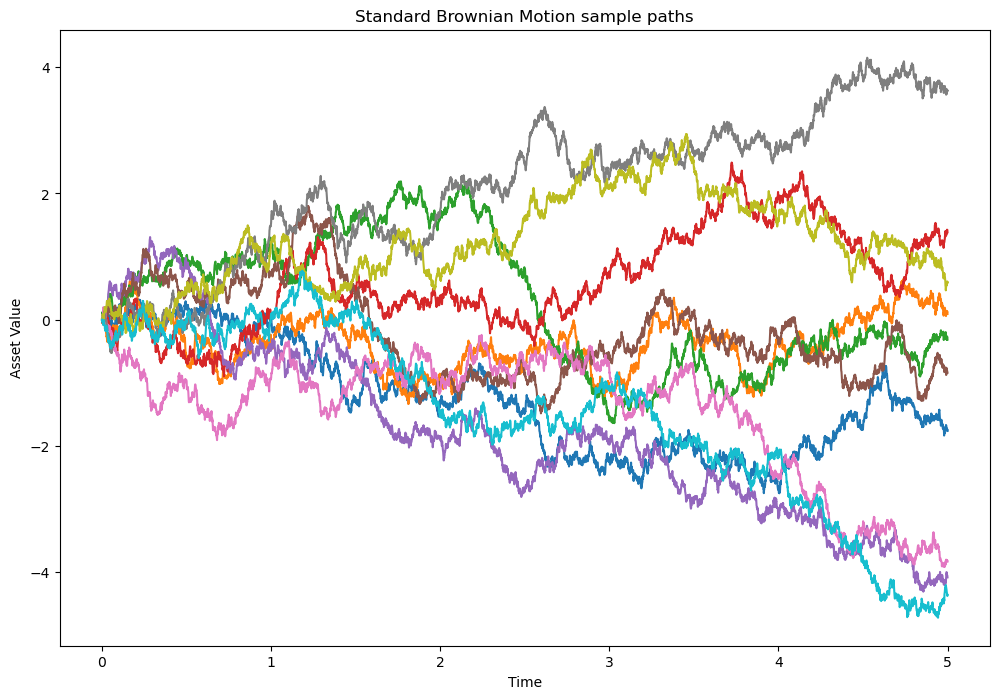

Estimated E[W(2.5)]: -0.33373969384188873
Estimated E[W(5)]: -0.9521526358113543


In [5]:
# Sample 10 standard brownian motion paths
W = np.zeros((paths, values))  # W(0) = 0
for i in range(values-1):
    W[:, i+1] = W[:, i] + np.sqrt(dt) * Z[:, i]
    
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title("Standard Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Calculate the indices corresponding to t = 2.5 and t = 5
index_2_5 = int(2.5 / dt)
index_5 = int(5.0 / dt)

# Calculate the Expectation at W(2.5) and W(5) from the 10 paths
E_W_2_5 = np.mean(W[:, index_2_5])
E_W_5 = np.mean(W[:, index_5])

print(f"Estimated E[W(2.5)]: {E_W_2_5}")
print(f"Estimated E[W(5)]: {E_W_5}")

### Q.2

#### (a)

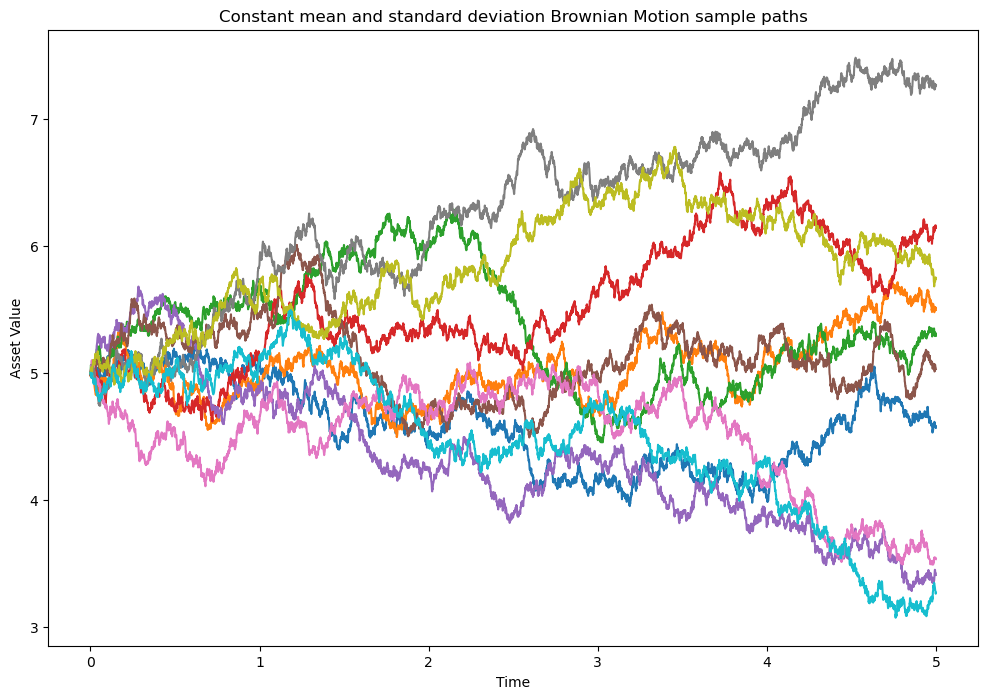

Estimated E[X(2.5)]: 5.058085144076797
Estimated E[X(5)]: 4.973923682093407


In [6]:
µ = 0.09
σ = 0.5

# Sample 10 Brownian motion discretization (BM(µ, σ^2)) paths
X = 5 * np.ones((paths, values)) # X(0) = 5
for i in range(values-1):
    X[:, i+1] = X[:, i] + µ * dt + σ * np.sqrt(dt) * Z[:, i]
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Calculate the Expectation at X(2.5) and X(5) from the 10 paths
E_X_2_5 = np.mean(X[:, index_2_5])
E_X_5 = np.mean(X[:, index_5])

print(f"Estimated E[X(2.5)]: {E_X_2_5}")
print(f"Estimated E[X(5)]: {E_X_5}")

#### (b)

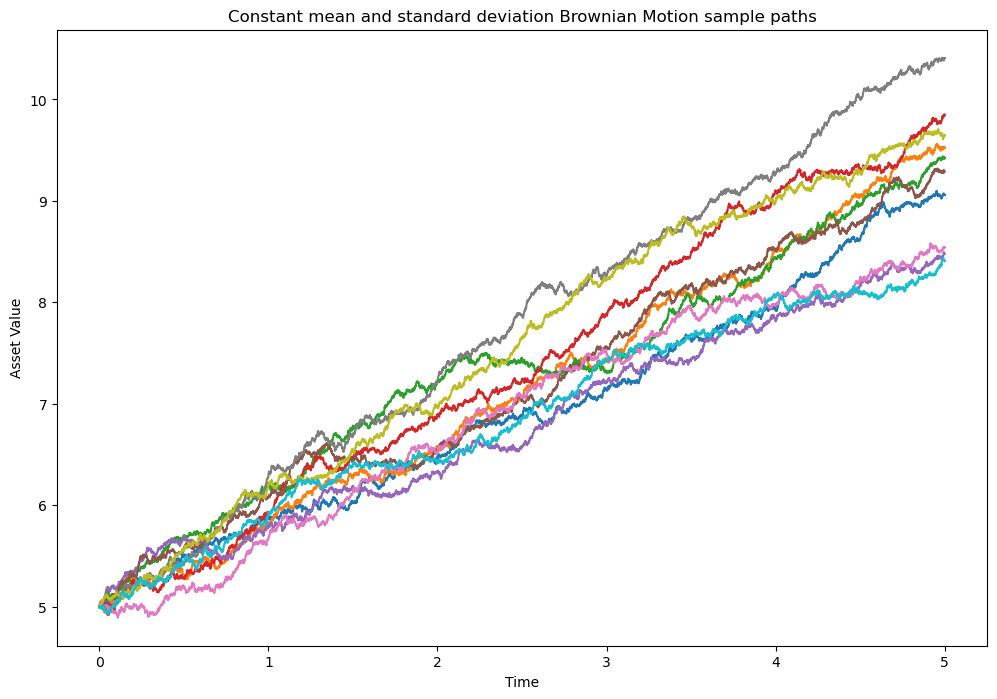

Estimated E[X(2.5)]: 7.166114986521303
Estimated E[X(5)]: 9.26196184104673


In [7]:
µ = 0.9
σ = 0.25

# Sample 10 Brownian motion discretization (BM(µ, σ^2)) paths
X = 5 * np.ones((paths, values)) # X(0) = 5
for i in range(values-1):
    X[:, i+1] = X[:, i] + µ * dt + σ * np.sqrt(dt) * Z[:, i]
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Calculate the Expectation at X(2.5) and X(5) from the 10 paths
E_X_2_5 = np.mean(X[:, index_2_5])
E_X_5 = np.mean(X[:, index_5])

print(f"Estimated E[X(2.5)]: {E_X_2_5}")
print(f"Estimated E[X(5)]: {E_X_5}")

#### (c)

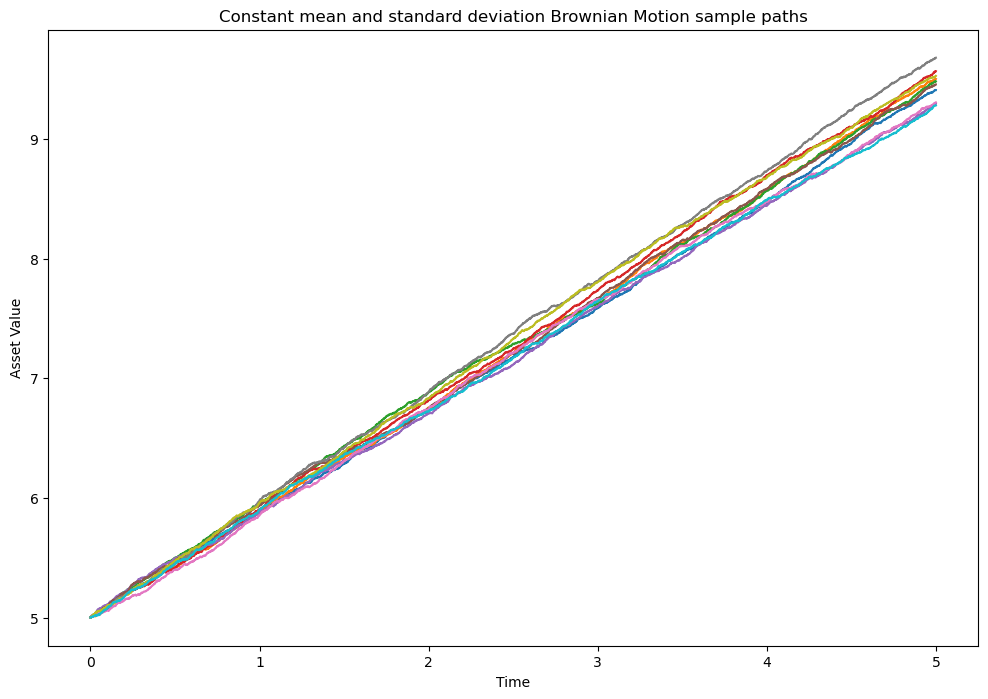

Estimated E[X(2.5)]: 7.232862925289683
Estimated E[X(5)]: 9.452392368208994


In [8]:
µ = 0.9
σ = 0.05

# Sample 10 Brownian motion discretization (BM(µ, σ^2)) paths
X = 5 * np.ones((paths, values)) # X(0) = 5
for i in range(values-1):
    X[:, i+1] = X[:, i] + µ * dt + σ * np.sqrt(dt) * Z[:, i]
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Calculate the Expectation at X(2.5) and X(5) from the 10 paths
E_X_2_5 = np.mean(X[:, index_2_5])
E_X_5 = np.mean(X[:, index_5])

print(f"Estimated E[X(2.5)]: {E_X_2_5}")
print(f"Estimated E[X(5)]: {E_X_5}")

### Q.3

In [9]:
def M(t):
    return 0.0325 - 0.05 * t

def Σ(t):
    return 0.012 + 0.0138 * t - 0.00125 * t**2

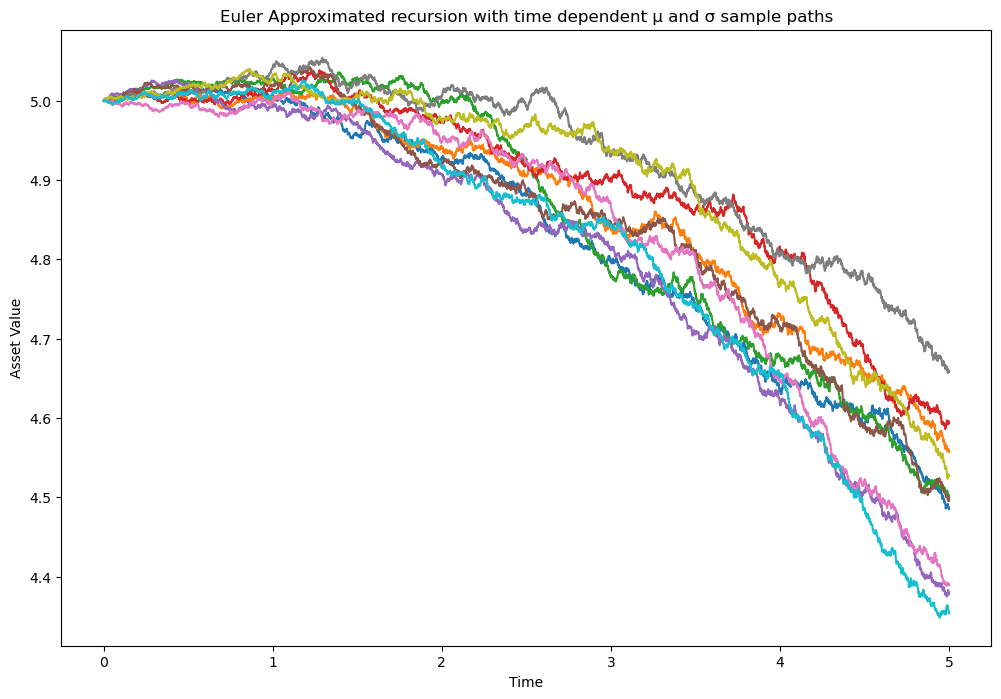

Estimated E[Y(2.5)]: 4.911209657488757
Estimated E[Y(5)]: 4.4937829036969275


In [10]:
# Sample 10 Euler approximated recursion with time dependent µ and σ paths
Y = 5 * np.ones((paths, values)) # Y(0) = 5
for i in range(values-1):
    Y[:, i+1] = Y[:, i] + M(t_axis[i]) * dt + Σ(t_axis[i]) * np.sqrt(dt) * Z[:, i]
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, Y[path, :])
ax.set_title("Euler Approximated recursion with time dependent µ and σ sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Calculate the Expectation at Y(2.5) and Y(5) from the 10 paths
E_Y_2_5 = np.mean(Y[:, index_2_5])
E_Y_5 = np.mean(Y[:, index_5])

print(f"Estimated E[Y(2.5)]: {E_Y_2_5}")
print(f"Estimated E[Y(5)]: {E_Y_5}")

### Q.4

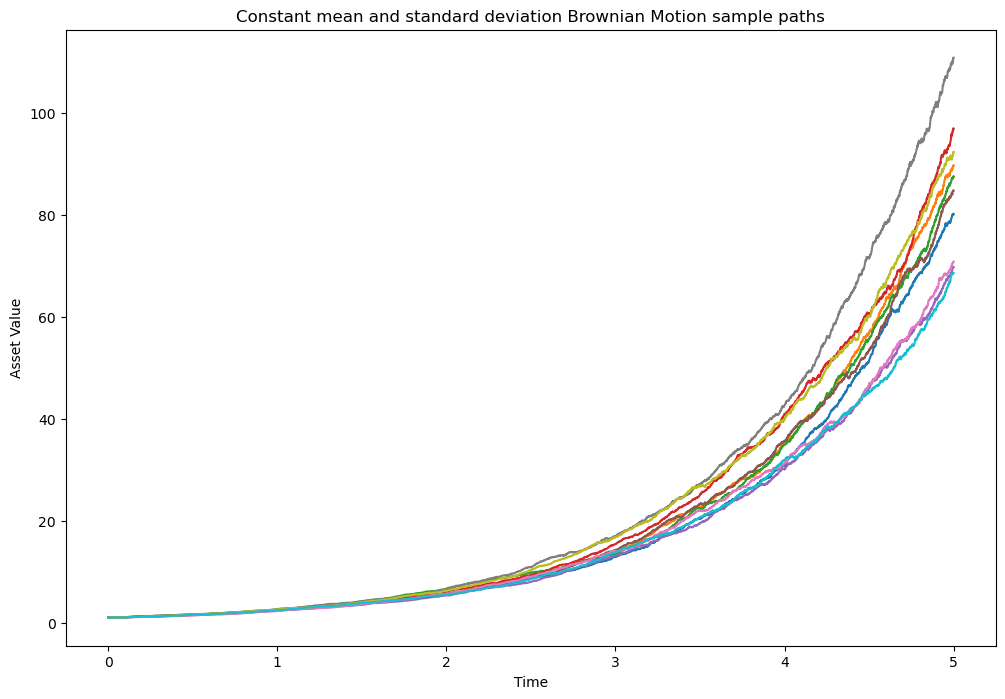

In [11]:
µ = 0.9
σ = 0.06

# Sample 10 Geometric Brownian motion (GBM) paths
S = np.ones((paths, values)) # S(0) = 1
for i in range(values-1):
    S[:, i+1] = S[:, i] * np.exp((µ - 0.5 * σ * σ) * dt + σ * np.sqrt(dt) * Z[:, i])
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, S[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

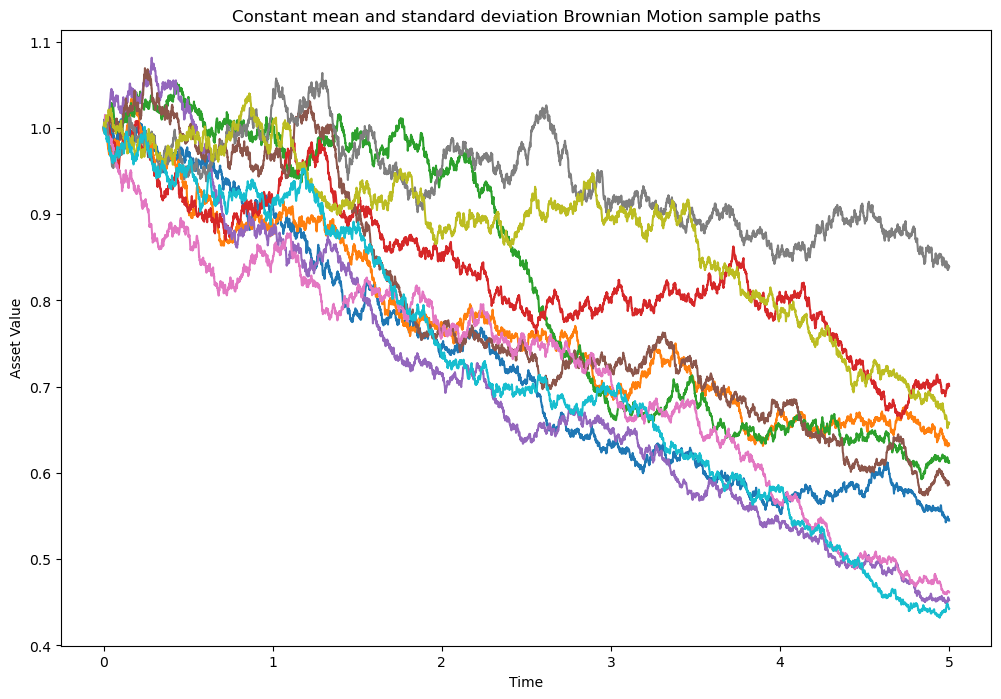

In [12]:
µ = -0.09
σ = 0.08

# Sample 10 Geometric Brownian motion (GBM) paths
S = np.ones((paths, values)) # S(0) = 1
for i in range(values-1):
    S[:, i+1] = S[:, i] * np.exp((µ - 0.5 * σ * σ) * dt + σ * np.sqrt(dt) * Z[:, i])
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, S[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

In [43]:
def sim(N, µ, σ, n, T, seed):
    B = []
    for i in range(N):
        Z = box_muller(a, c, m, seed, N)
        A = np.zeros(N)
        A[0] = 5
        seed += 1
        for j in range(1, N):
            A[j] = A[j-1] * math.exp((µ - 0.5 * σ * σ) * (T/(N-1)) + σ * Z[j-1] * math.sqrt(T/(N-1)))
        B.append(A[-1])
    return B

In [47]:
data = sim(1000, 0.9, 0.2, 5001, 5, 42)
data = np.array(data)
print(str(np.mean(data)), "is close to theoretical mean of 500.1 in this case")

506.9744407561306 is close to theoretical mean of 500.1 in this case


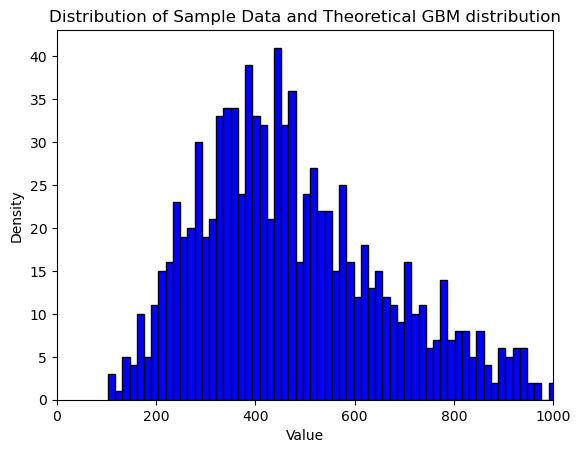

In [48]:
# Plotting the histograms
plt.hist(data, bins=100, edgecolor='black', color='blue', label='Sample Data Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Sample Data and Theoretical GBM distribution')
plt.xlim([0, 1000])
plt.show()

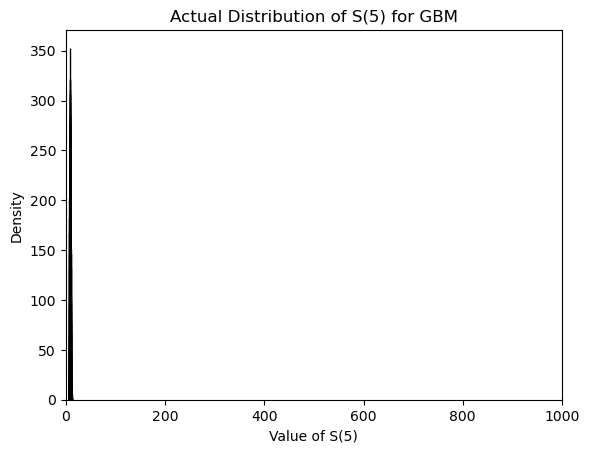

In [18]:
µ = 0.1
σ = 0.05
T = 5
S0 = 5
samples = 10000
P = np.array(box_muller(a, c, m, seed, samples))
S_T = S0 * np.exp((µ-0.5 * σ**2) * T + σ * np.sqrt(T) * P)

# Plotting the histgrams
plt.hist(S_T, bins=100, edgecolor='black', color='blue')
plt.xlabel('Value of S(5)')
plt.ylabel('Density')
plt.title('Actual Distribution of S(5) for GBM')
plt.xlim([0, 1000])
plt.show()

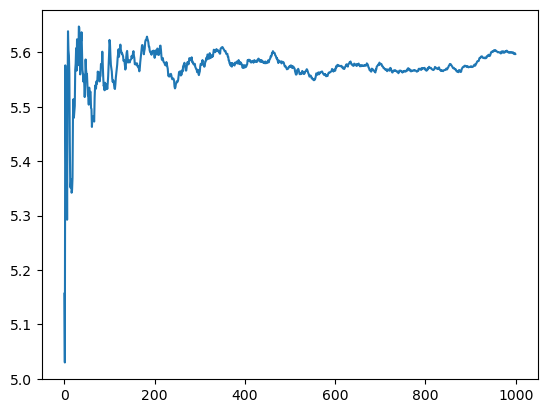

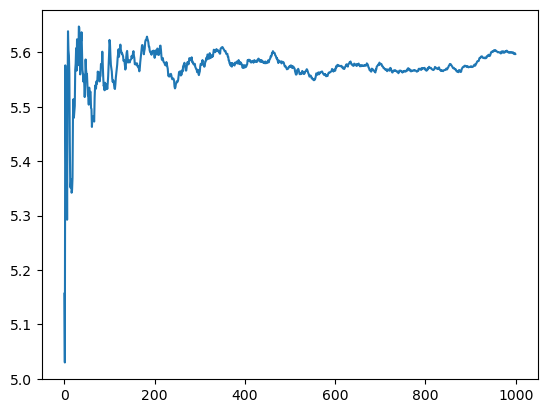

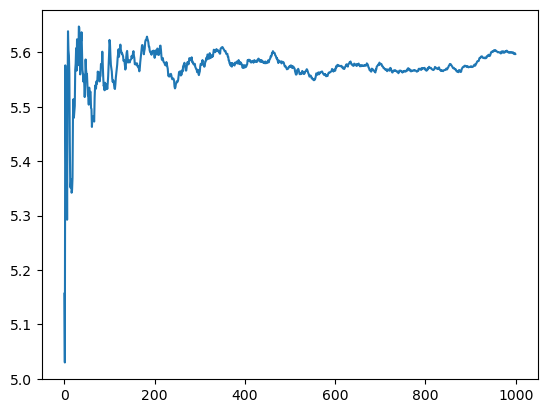

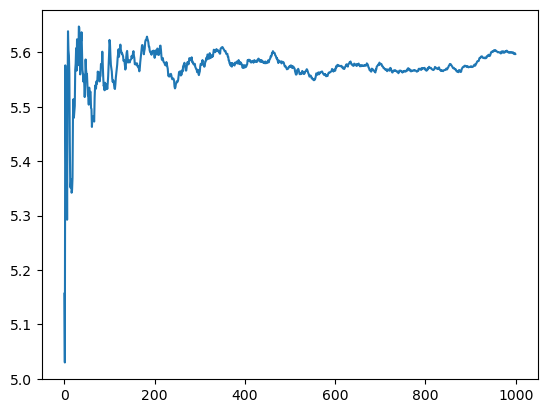

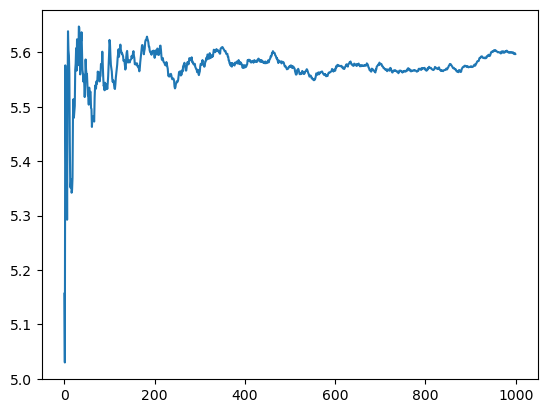

In [49]:
# Simulating and Plotting Phase
for i in range(5):
    A = sim(1000, 0.06, 0.2, 50, 1, 42)
    µ = [np.mean(A[0:i]) for i in range(1, 1001)]
    X = [i for i in range(1000)]
    plt.plot(X, µ)
    plt.show()